**Molecular Dynamics simulation routine:**

this is some text that explains stuff you do.

* Import external libraries:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import copy
import numpy as np
import scipy as scy

Traceback (most recent call last):
  File "/home/dompo/.vscode/extensions/ms-python.python-2024.16.1-linux-x64/python_files/python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1
    %matplotlib inline
    ^
SyntaxError: invalid syntax



* Creating a particle class:

In [5]:
class Particle:
    def __init__(self, r, x, y, vx, vy):
        self.r = r
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def __repr__(self):
        return str("This is a particle at %0.2f, %0.2f with v=%0.2f,%0.2f" % (self.x,self.y,self.vx,self.vy))

* Defining the box:

In [6]:
box = [20,20]

* Initialize velocities:

In [7]:
vel = 0.5
angle = np.random.uniform(0,2*np.pi)

* Initialize position:

In [8]:
x_rand = np.random.randint(1,box[0]-1,1)
y_rand = np.random.randint(1,box[1]-1,1)

* Setting up the particle:

In [9]:
p1 = Particle(0.5,x_rand,y_rand,np.sin(angle)*vel,np.cos(angle)*vel)

In [10]:
p1

This is a particle at 4.00, 1.00 with v=0.48,-0.15


* Defining simulation step numbers

In [11]:
steps = 2000

* initialize trajectory:

In [12]:
data_traj = np.zeros((4,steps,n))
print(data_traj)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


* define time integrator for numerical, stepwise solution of equation of motion with a discrete time step $dt$:

In [13]:
def move(p,dt):
    p.x = p.x + p.vx*dt
    p.y = p.y + p.vy*dt
    return p

* define box reflection:

In [14]:
def reflect(p):
    if (p.x + p.r) >= box[0]:
        p.vx = p.vx * (-1)
    if (p.x + p.r) <= p.r:
        p.vx = p.vx * (-1)
    if (p.y + p.r) >= box[1]:
        p.vy = p.vy * (-1)
    if (p.y + p.r) <= p.r:
        p.vy = p.vy * (-1)
    return p

* carry out simulation:

In [15]:
for i in range(steps):
    reflect(p1)
    move(p1,1)
    data_traj[:,i] = [p1.x, p1.y, p1.vx, p1.vy]

Traceback (most recent call last):
  File "/home/dompo/.vscode/extensions/ms-python.python-2024.16.1-linux-x64/python_files/python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 4, in <module>
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.



* Plotting trajectory with Matplotlib:

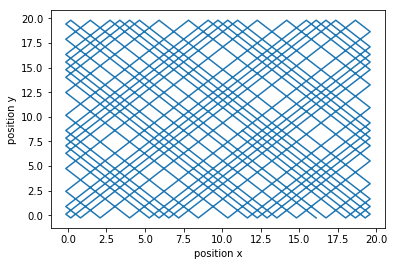

In [16]:
plt.plot(data_traj[0],data_traj[1],'-')
plt.xlabel('position x')
plt.ylabel('position y')
plt.show()

**Animate trajectory:**

* Set up the figure, the axis, and the plot element we want to animate

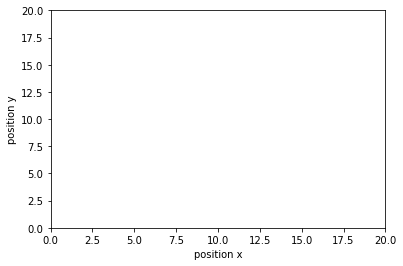

In [17]:
fig, ax = plt.subplots()

ax.set_xlim((0, box[0]))
ax.set_ylim((0, box[1]))

plt.xlabel('position x')
plt.ylabel('position y')

dot, = ax.plot([], [], 'bo', ms=5.0)


* initialization function: plot the background of each frame

In [18]:
def init():
    dot.set_data([], [])
    return (dot,)

* animation function. This is called sequentially

In [19]:
def animate(i):
    x = data_traj[0,i]
    y = data_traj[1,i]
    dot.set_data(x, y)
    return (dot,)

* call the animator. blit=True means only re-draw the parts that have changed.

In [20]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=20, blit=True)

Traceback (most recent call last):
  File "/home/dompo/.vscode/extensions/ms-python.python-2024.16.1-linux-x64/python_files/python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
NameError: name 'animation' is not defined. Did you mean: 'animate'?



In [21]:
HTML(anim.to_html5_video())

Traceback (most recent call last):
  File "/home/dompo/.vscode/extensions/ms-python.python-2024.16.1-linux-x64/python_files/python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
NameError: name 'HTML' is not defined



**Histogramming:**

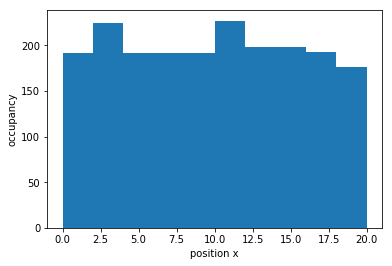

In [22]:
plt.hist(data_traj[0],range=(0,box[0]),bins=10)
plt.xlabel('position x')
plt.ylabel('occupancy')
plt.show()

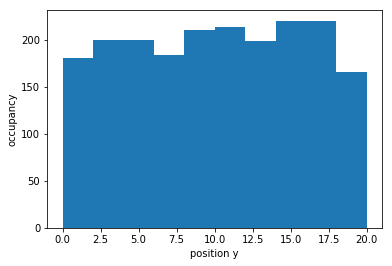

In [36]:
plt.hist(data_traj[1],range=(0,box[1]),bins=10)
plt.xlabel('position y')
plt.ylabel('occupancy')
plt.show()

In [23]:
plt.hist2d(data_traj[0], data_traj[1], range=[[0,box[0]],[0,box[1]]], bins=10)
plt.xlabel('position x')
plt.ylabel('position y')
plt.colorbar().set_label('occupancy')
plt.show()

Traceback (most recent call last):
  File "/home/dompo/Documents/Complex-Classical-Systems/.ccs-env/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py", line 988, in histogramdd
    N, D = sample.shape
           ^^^^^^^^^^^^
AttributeError: 'list' object has no attribute 'shape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dompo/.vscode/extensions/ms-python.python-2024.16.1-linux-x64/python_files/python_server.py", line 130, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "/home/dompo/Documents/Complex-Classical-Systems/.ccs-env/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3499, in hist2d
    __ret = gca().hist2d(
            ^^^^^^^^^^^^^
  File "/home/dompo/Documents/Complex-Classical-Systems/.ccs-env/lib/python3.12/site-packages/matplotlib/__init__.py", line 1473, in inner
   

**Interpretation:**
* in the reduced data projection, the occupancy of each bin seems even and well-distributed
* in the full dimensional projection, it can be seen easily that the box is **not** fully sampled, large undersampled patches present
* *data dimensionality reduction always brings the danger of wrong projection!*

**Solution for improvements:**
* enhance sampling by
    * prolong the simulation
    * increase the time step
* *Caveat: all solutions come with problems like increased computational cost or sampling errors!*